<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/california_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression with California Housing Dataset**

In this notebook, we'll explore **Linear Regression** using the built-in California housing dataset available in Google Colab.

We’ll cover:
- Loading and exploring the dataset
- Training a **Simple Linear Regression** model
- Making predictions
- Visualizing results
- Extending to **Multiple Linear Regression**


# Introduction to Linear Regression

## What is Linear Regression?

Linear Regression is one of the simplest and most widely used **machine learning algorithms**.  
It tries to find the **relationship between input features (X) and an output target (y)** by fitting a straight line (or hyperplane in multiple dimensions).

---

## The Equation

### Simple Linear Regression (one feature):

`y = a . X + b`


- **X** → input feature (e.g., income)  
- **y** → predicted output (e.g., house price)  
- **a** → slope (how much y changes when X changes by 1)  
- **b** → intercept (baseline value when X=0)  

---

### Multiple Linear Regression (many features):

`y=a₁​X₁​+a₂​X₂​+...+aₙ​Xₙ​+b`


- **X₁, X₂, …, Xₙ → input features (e.g., income, rooms, house age)**
- **y** → predicted output  
- **a₁, a₂, …, aₙ** → coefficients showing each feature’s importance  
- **b** → intercept (baseline)  

---

## Example in Housing Data

- **Simple Regression**: Predict house value only from `median_income`.  
- **Multiple Regression**: Predict house value using `median_income`, `total_rooms`, `housing_median_age`, etc.  

---

## Why is Linear Regression important?

* Easy to understand & interpret  
* Forms the foundation for more advanced ML models  
* Works well when relationships are approximately linear  
* *Limited when the relationship is complex or nonlinear*

---



*   In this notebook, we’ll start with **Simple Linear Regression** (income → house value) and then extend it to **Multiple Linear Regression** (income + rooms + age → house value) using the California Housing dataset.




In [52]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [53]:
# Load dataset
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

print(" Dataset loaded successfully!")

print("\n First 5 rows:")
print(df.head())

print("\n Columns available:")
print(df.columns.tolist())

 Dataset loaded successfully!

 First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

 Columns available:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'househol

In [71]:
print("Summary statistics")
print(df.describe())

print("--------------------------------------------------------------------------")

print("Data types and null checks")
print(df.info())

Summary statistics
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
2

## What is Simple Linear Regression?

**Simple Linear Regression (SLR)** is the most basic form of regression analysis.

It tries to describe the relationship between:

* **One independent variable (X)** → the input feature
* **One dependent variable (y)** → the output we want to predict

using a **straight line**.

---

### The Equation

The model assumes:

$$
y = a \cdot X + b
$$

* **X** → the input (example: median income)
* **y** → the output (example: house value)
* **a (slope / coefficient)** → how much y changes when X increases by 1 unit
* **b (intercept)** → the value of y when X = 0

---

### Example (Housing Dataset)

Suppose we want to predict **median house value** based only on **median income**.

The regression line might look like:

$$
\text{House Value} = 38,147 \cdot \text{Income} + 23,789
$$

That means:

* For every +1 in income (10,000 USD), house value increases by about **38,147 USD**
* Even at income 0, the model assumes a baseline house price of **23,789 USD**

---

### Why use it?

* **Simplicity** → Easy to calculate, interpret, and visualize (just a line).
* **Baseline model** → Often the first step before trying more complex models.
* **Good when relationship is linear** → Works well if y increases/decreases steadily with X.

---

### Limitations

* Real-world data is rarely explained by *just one feature*.
* Assumes the relationship is a **straight line** (not curved, exponential, etc.).
* Often underfits complex datasets (like housing prices, which depend on location, age, rooms, etc.).

---

 **In short**:
Simple Linear Regression draws the *best-fit line* through your data using one input variable, so you can make predictions about the output.

---



## Simple Linear Regression
We will predict **median house value** using only **median income**.

In [54]:
# Define features (X) and target (y)
X = df[["median_income"]]   # must be 2D
y = df["median_house_value"]

# Train model
model = LinearRegression()
model.fit(X, y)

print("Model training complete!")
print(f"Equation: Price = {model.coef_[0]:.2f} × Income + {model.intercept_:.2f}")

# Predictions
y_pred = model.predict(X)

# Evaluate
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.3f}")

Model training complete!
Equation: Price = 42054.07 × Income + 43980.63
R² Score: 0.479


In [68]:
# Example prediction
income = 5.0   # 5.0 means $50,000 (since income is in tens of thousands)
pred = model.predict(pd.DataFrame([[income]], columns=["median_income"]))[0]

print(f"Income: {income} = Predicted House Value: ${pred:,.0f}")


Income: 5.0 = Predicted House Value: $254,251




---



In [55]:
# printing 1st row
df.iloc[[0]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0


# Test on 1st row

In [56]:
# Row 0 actual vs predicted
x0 = df[["median_income"]].iloc[[0]]
y0_actual = df["median_house_value"].iloc[0]
y0_pred = model.predict(x0)[0]

print(f"Income: {x0.values[0][0]}")
print(f"Actual Value: {y0_actual}")
print(f"Predicted Value: {y0_pred:.0f}")
print(f"Error (residual): {y0_pred - y0_actual:.0f}")


Income: 1.4936
Actual Value: 66900.0
Predicted Value: 106793
Error (residual): 39893


#Visualization

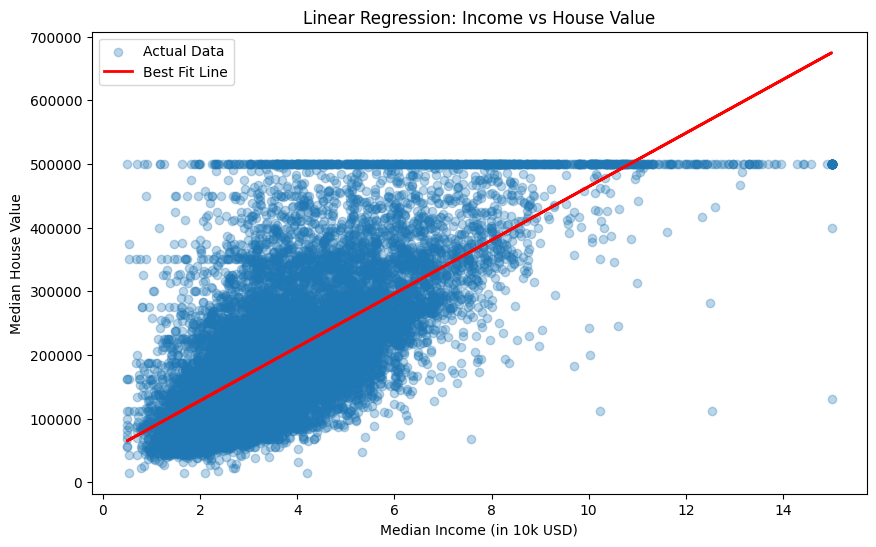

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3, label="Actual Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("Median Income (in 10k USD)")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Income vs House Value")
plt.legend()
plt.show()

---

## What is Multiple Linear Regression?

**Multiple Linear Regression (MLR)** extends **Simple Linear Regression** by allowing us to use **two or more input variables** (features) to predict one output (target).

---

### The Equation

For **n features**:

$$
y = a_1 X_1 + a_2 X_2 + a_3 X_3 + \dots + a_n X_n + b
$$

* **$y$** → predicted value (e.g., house price)
* **$X_1, X_2, X_3, …, X_n$** → input features (e.g., income, rooms, age, etc.)
* **$a_1, a_2, a_3, …$** → coefficients (effect of each feature on the prediction)
* **$b$** → intercept (baseline value when all inputs = 0)

---

### Example (Housing Dataset)

Suppose we want to predict **median\_house\_value** using **3 features**:

$$
\text{House Value} = 37,000 \cdot \text{Income} + 4.5 \cdot \text{Rooms} - 280 \cdot \text{Age} + 25,000
$$

This means:

* **Income** → +1 in income (10,000 USD) increases house value by **37,000 USD**
* **Rooms** → each additional room adds about **\$4,500** to the house value
* **Age** → each year older reduces value by about **\$280**
* **25,000** → baseline house value when all features are 0

---

### Why use it?

* **More realistic** → Real-world outcomes depend on *multiple factors*.
* **Better predictions** → Can capture more variation in the data.
* **Flexible** → Can add as many features as you want.

---

### Limitations

* **Complexity** → Harder to visualize beyond 2D/3D.
* **Multicollinearity** → If features are strongly correlated (e.g., total\_rooms vs households), coefficients may be unstable.
* **Overfitting** → Too many features → model memorizes data instead of learning patterns.

---

**In short**:
Multiple Linear Regression finds the best-fit **plane (or hyperplane)** in higher dimensions instead of a simple line. It considers **several features together** to make predictions.

---

## Multiple Linear Regression
Now let’s improve the model by using more features: **median_income**, **total_rooms**, and **housing_median_age**.

In [59]:
# Select multiple features
X_multi = df[["median_income", "total_rooms", "housing_median_age"]]
y = df["median_house_value"]

# Train multiple regression model
multi_model = LinearRegression()
multi_model.fit(X_multi, y)

# Predictions
y_pred_multi = multi_model.predict(X_multi)

# Evaluate
r2_multi = r2_score(y, y_pred_multi)
print(" Multiple Linear Regression complete!")
print(f" R² Score: {r2_multi:.3f}")
print(" Coefficients:")
for col, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"  {col}: {coef:.2f}")
print(f"Intercept: {multi_model.intercept_:.2f}")

 Multiple Linear Regression complete!
 R² Score: 0.518
 Coefficients:
  median_income: 42719.26
  total_rooms: 3.77
  housing_median_age: 1970.22
Intercept: -24896.40


#Visualization

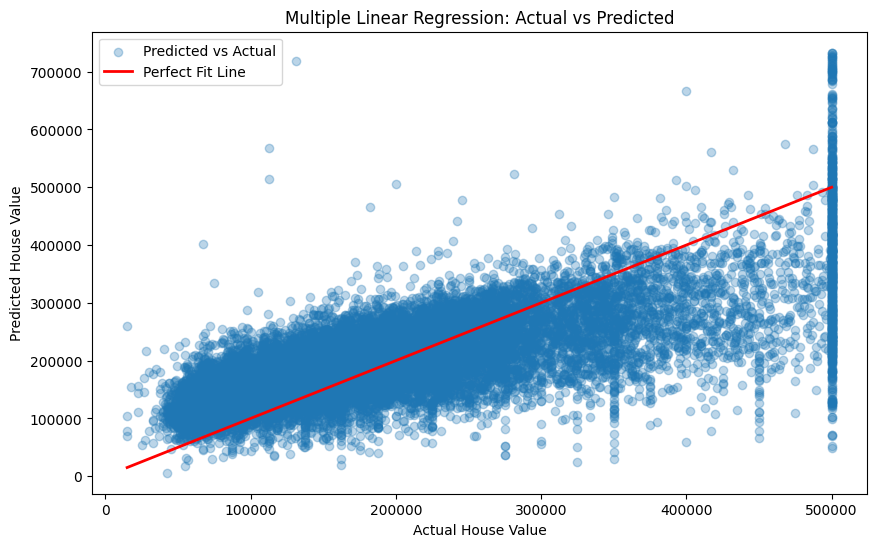

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(y, y_pred_multi, alpha=0.3, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2, label="Perfect Fit Line")
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [60]:
# printing 1st row
df.iloc[[0]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0


# Test on 1st row

In [61]:
# Row 0 actual vs predicted (multiple regression)
x0_multi = df[["median_income", "total_rooms", "housing_median_age"]].iloc[[0]]
y0_actual = df["median_house_value"].iloc[0]
y0_pred_multi = multi_model.predict(x0_multi)[0]

print("Multiple Linear Regression")
print(f"Features: {x0_multi.to_dict(orient='records')[0]}")
print(f"Actual Value: {y0_actual}")
print(f"Predicted Value: {y0_pred_multi:.0f}")
print(f"Error (residual): {y0_pred_multi - y0_actual:.0f}")


Multiple Linear Regression
Features: {'median_income': 1.4936, 'total_rooms': 5612.0, 'housing_median_age': 15.0}
Actual Value: 66900.0
Predicted Value: 89619
Error (residual): 22719



---

###  Results for Row 0

**Simple Linear Regression (only income):**

*  Income = **1.4936**
*  Actual Value = **66,900**
*  Predicted Value = **106,793**
*  Residual = **+39,893** (model *overestimates a lot*)

**Multiple Linear Regression (income + rooms + age):**

*  Features = `{median_income: 1.4936, total_rooms: 5612, housing_median_age: 15}`
*  Actual Value = **66,900**
*  Predicted Value = **89,619**
*  Residual = **+22,719** (closer to the truth)

---

###  Key Insight

* Adding extra features **reduces error significantly** (39k → 22k).
* But it still doesn’t hit exactly, because house value is influenced by **more variables** (location, population, households, etc.).
* This is the tradeoff: more features → better fit, but still approximation.

---



# Side-by-Side Comparison Plot

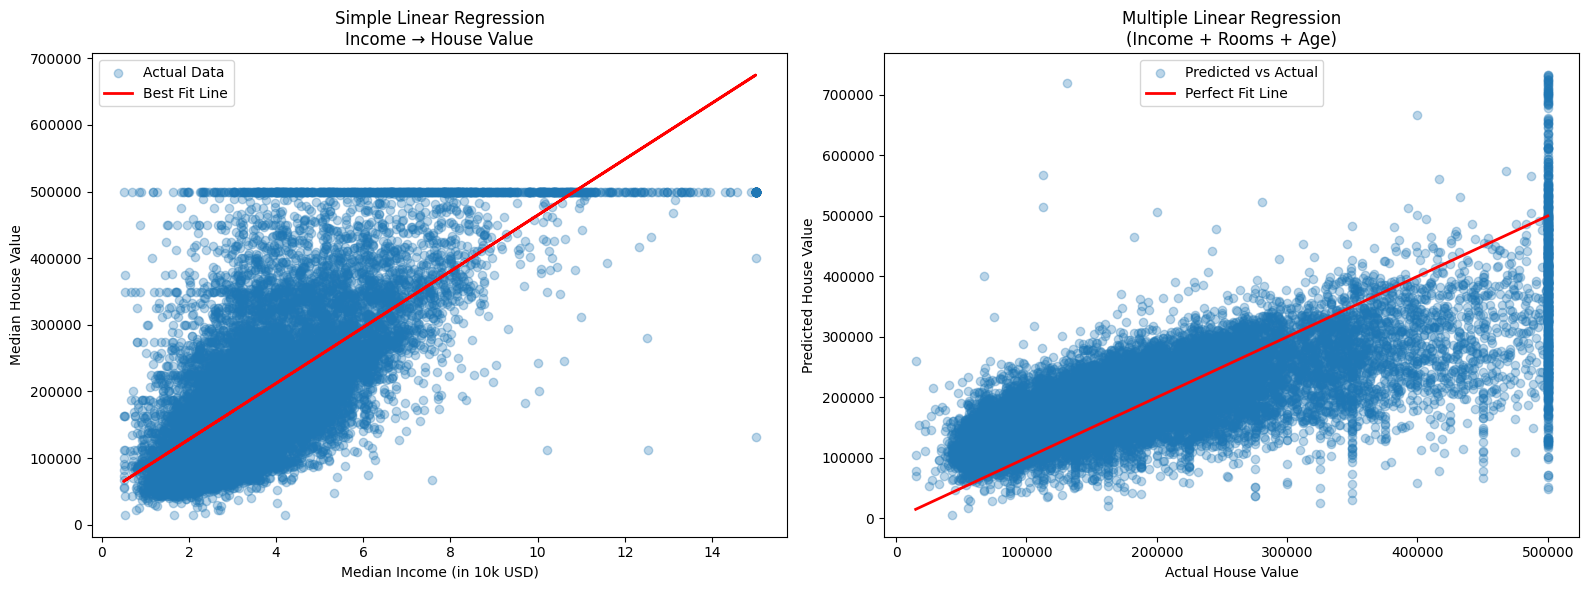

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Simple Linear Regression
axes[0].scatter(X, y, alpha=0.3, label="Actual Data")
axes[0].plot(X, y_pred, color="red", linewidth=2, label="Best Fit Line")
axes[0].set_xlabel("Median Income (in 10k USD)")
axes[0].set_ylabel("Median House Value")
axes[0].set_title("Simple Linear Regression\nIncome → House Value")
axes[0].legend()

# Multiple Linear Regression
axes[1].scatter(y, y_pred_multi, alpha=0.3, label="Predicted vs Actual")
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2, label="Perfect Fit Line")
axes[1].set_xlabel("Actual House Value")
axes[1].set_ylabel("Predicted House Value")
axes[1].set_title("Multiple Linear Regression\n(Income + Rooms + Age)")
axes[1].legend()

plt.tight_layout()
plt.show()


## Summary
- **Simple Regression (Income only):** Easier to understand, but less accurate.
- **Multiple Regression (Income + Rooms + Age):** Captures more variation → better predictions.

**Want to try more?** Replace features in `X_multi` with others like `population` or `households` to experiment.

---

## **1. Dataset Loading & Exploration**

```python
import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
```

* Loads the **California housing dataset**.
* Printing the first 5 rows and columns helps understand the data structure.


```python
print(df.describe())   # Summary statistics
print(df.info())       # Data types and null checks
```

This is useful for identifying missing values or anomalies before modeling.

---

## **2. Simple Linear Regression**

```python
X = df[["median_income"]]
y = df["median_house_value"]

model = LinearRegression()
model.fit(X, y)
```

* **Feature:** `median_income`
* **Target:** `median_house_value`
* Fit the model to learn `slope` and `intercept`.

**Prediction Example:**

```python
income = 5.0
pred = model.predict(pd.DataFrame([[income]], columns=["median_income"]))[0]
```

* Predicts house value for a household earning \$50,000.

**Evaluation:**

```python
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
```

* R² score indicates how well the line explains variation in house prices.

**Visualization** is done with a scatter plot and the best-fit line.

---

## **3. Multiple Linear Regression**

```python
X_multi = df[["median_income", "total_rooms", "housing_median_age"]]
multi_model = LinearRegression()
multi_model.fit(X_multi, y)
```

* Uses **three features** to predict `median_house_value`.
* Helps reduce residuals compared to simple regression.

**Evaluation:**

```python
y_pred_multi = multi_model.predict(X_multi)
r2_multi = r2_score(y, y_pred_multi)
```

* R² will generally be higher than the simple regression.
* You can experiment with other features: `population`, `households`, `longitude`, `latitude`.

**Visualization:** Scatter plot of actual vs predicted values, with a perfect-fit line.

---

## **4. Row-Level Predictions**

We correctly show predictions and residuals for the first row:

```python
x0_multi = df[["median_income", "total_rooms", "housing_median_age"]].iloc[[0]]
y0_pred_multi = multi_model.predict(x0_multi)[0]
```

* Residual = Predicted − Actual
* Demonstrates how much better multiple regression performs.

---

## **5. Comparison Plot**

Side-by-side comparison of **simple vs multiple regression**:

```python
fig, axes = plt.subplots(1, 2, figsize=(16,6))
```

* Left: Income → House Value (simple regression)
* Right: Multiple features → House Value (multiple regression)

Visual comparison is key for understanding purposes.

---

## **Suggested Enhancements**

1. **Feature Scaling (optional)**

   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   X_multi_scaled = scaler.fit_transform(X_multi)
   ```

   * Helps when features have very different ranges (`total_rooms` vs `median_income`).

2. **Train/Test Split**

   ```python
   from sklearn.model_selection import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
   ```

   * Avoids overfitting by evaluating on unseen data.

3. **Residual Plot**

   ```python
   plt.scatter(y_pred_multi, y_pred_multi - y)
   plt.axhline(y=0, color='red', linestyle='--')
   ```

   * Visualizes where predictions overestimate or underestimate.

4. **Correlation Heatmap**

   ```python
   import seaborn as sns
   sns.heatmap(df.corr(), annot=True, fmt=".2f")
   ```

   * Helps choose features for multiple regression.

5. **Handle Outliers**

   * `median_house_value` often has a ceiling in this dataset (500,000).
   * Can improve model performance if capped or log-transformed.

---


**References:**

https://en.wikipedia.org/wiki/Linear_regression

https://www.geeksforgeeks.org/machine-learning/ml-multiple-linear-regression-using-python/

https://medium.com/@joshibhagyesh29/understanding-simple-linear-regression-vs-multiple-linear-regression-a-guide-with-examples-c3e8945e4830

https://www.kaggle.com/code/abrahamanderson/simple-vs-multiple-linear-regression

https://www.tandfonline.com/doi/full/10.1080/10691898.2001.11910537#d1e90